In [1]:
import pandas as pd

import seaborn as sns
sns.set_style("ticks")
sns.set_palette("deep")
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
%matplotlib inline

In [2]:
bikes = pd.read_csv("./data/london_merged.csv")

In [3]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bikes.shape

(17414, 10)

In [8]:
bikes.columns

Index(['timestamp', 'count', 'temp', 'temp_feels_like', 'humidity',
       'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')

## Preprocessing
#### 1. Rename the columns
#### 2. Create dummy variables for 'weather' and 'seasons'
#### 3. Create separate 'date' and 'time' columns out of 'timestamp'
#### ----

#### Renaming Columns

In [5]:
bikes.rename(columns={"cnt": "count",
                      "t1": "temp", 
                      "t2": "temp_feels_like",
                      "hum": "humidity"}, inplace=True)

#### Creating Dummy Variables for 'weather' and 'seasons'

In [9]:
bikes = pd.get_dummies(bikes, columns=['weather_code'])

In [10]:
bikes = pd.get_dummies(bikes, columns=['season'])

#### Renaming the Dummy Variables

In [11]:
bikes.rename(columns={"weather_code_1.0": "mostly_clear",
                      "weather_code_2.0": "few_clouds",
                      "weather_code_3.0": "broken_clouds",
                      "weather_code_4.0": "cloudy",
                      "weather_code_7.0": "rain",
                      "weather_code_10.0": "rain_with_thunderstorm",
                      "weather_code_26.0": "snowfall"}, inplace=True)

In [12]:
bikes.rename(columns={"season_0.0": "spring",
                      "season_1.0": "summer",
                      "season_2.0": "fall",
                      "season_3.0": "winter"}, inplace=True)

In [13]:
bikes.head()

,timestamp,count,temp,temp_feels_like,humidity,wind_speed,is_holiday,is_weekend,mostly_clear,few_clouds,broken_clouds,cloudy,rain,rain_with_thunderstorm,snowfall,spring,summer,fall,winter
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1


#### Assessing the data types, and creating separate 'date' and 'time' columns out of 'timestamp'

In [14]:
bikes.dtypes

timestamp                  object
count                       int64
temp                      float64
temp_feels_like           float64
humidity                  float64
wind_speed                float64
is_holiday                float64
is_weekend                float64
mostly_clear                uint8
few_clouds                  uint8
broken_clouds               uint8
cloudy                      uint8
rain                        uint8
rain_with_thunderstorm      uint8
snowfall                    uint8
spring                      uint8
summer                      uint8
fall                        uint8
winter                      uint8
dtype: object

In [15]:
bikes['date'] = pd.to_datetime(bikes['timestamp']).dt.normalize()
bikes['time'] = pd.to_datetime(bikes['timestamp']).dt.time

In [16]:
bikes.head()

,timestamp,count,temp,temp_feels_like,humidity,wind_speed,is_holiday,is_weekend,mostly_clear,few_clouds,...,cloudy,rain,rain_with_thunderstorm,snowfall,spring,summer,fall,winter,date,time
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,1,2015-01-04,00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,1,2015-01-04,01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,1,2015-01-04,02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,1,2015-01-04,03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,1,0,...,0,0,0,0,0,0,0,1,2015-01-04,04:00:00


#### Rearranging columns and dropping 'timestamp'

In [17]:
cols = bikes.columns.tolist()
cols

['timestamp',
 'count',
 'temp',
 'temp_feels_like',
 'humidity',
 'wind_speed',
 'is_holiday',
 'is_weekend',
 'mostly_clear',
 'few_clouds',
 'broken_clouds',
 'cloudy',
 'rain',
 'rain_with_thunderstorm',
 'snowfall',
 'spring',
 'summer',
 'fall',
 'winter',
 'date',
 'time']

In [18]:
cols = cols[-2:] + cols[:-2]
cols

['date',
 'time',
 'timestamp',
 'count',
 'temp',
 'temp_feels_like',
 'humidity',
 'wind_speed',
 'is_holiday',
 'is_weekend',
 'mostly_clear',
 'few_clouds',
 'broken_clouds',
 'cloudy',
 'rain',
 'rain_with_thunderstorm',
 'snowfall',
 'spring',
 'summer',
 'fall',
 'winter']

In [19]:
bikes = bikes[cols]

In [21]:
bikes = bikes.drop(columns=['timestamp'])

In [22]:
bikes.head()

,date,time,count,temp,temp_feels_like,humidity,wind_speed,is_holiday,is_weekend,mostly_clear,few_clouds,broken_clouds,cloudy,rain,rain_with_thunderstorm,snowfall,spring,summer,fall,winter
0,2015-01-04,00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,1
1,2015-01-04,01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1
2,2015-01-04,02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1
3,2015-01-04,03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1
4,2015-01-04,04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1


## Exploratory Data Analysis
#### 1. Statstical Analysis
#### 2. Calculate how many days are the observations spread over
#### 3. Assess the representation of 'seasons' and 'weather' within the data
#### 4. Calculate the statistics for weekdays/weekends and holidays/non-holidays
#### 5. Data Visualisation
#### ----

#### Statistical Analysis

In [23]:
bikes.describe()

,count,temp,temp_feels_like,humidity,wind_speed,is_holiday,is_weekend,mostly_clear,few_clouds,broken_clouds,cloudy,rain,rain_with_thunderstorm,snowfall,spring,summer,fall,winter
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,0.022051,0.285403,0.353164,0.231653,0.203916,0.084070,0.122947,0.000804,0.003446,0.252326,0.251924,0.247100,0.248651
std,1085.108068,5.571818,6.615145,14.313186,7.894570,0.146854,0.451619,0.477967,0.421900,0.402919,0.277501,0.328386,0.028343,0.058599,0.434360,0.434130,0.431338,0.432243
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Number of days

In [24]:
print("The observations were made over", max(bikes['date']) - min(bikes['date']))

The observations were made over 730 days 00:00:00


#### Representation of 'seasons' and 'weather'

Creating filters for all the 'seasons' and 'weather'

In [25]:
spring_filter = bikes[bikes['spring'] == 1]
summer_filter = bikes[bikes['summer'] == 1]
fall_filter = bikes[bikes['fall'] == 1]
winter_filter = bikes[bikes['winter'] == 1]

In [26]:
mostly_clear_filter = bikes[bikes['mostly_clear'] == 1]
few_clouds_filter = bikes[bikes['few_clouds'] == 1]
broken_clouds_filter = bikes[bikes['broken_clouds'] == 1]
cloudy_filter = bikes[bikes['cloudy'] == 1]
rain_filter = bikes[bikes['rain'] == 1]
rain_with_thunderstorm_filter = bikes[bikes['rain_with_thunderstorm'] == 1]
snowfall_filter = bikes[bikes['snowfall'] == 1]

Calculating representation

In [33]:
print("Number of observations per season:\n")
print('Spring = {:,}'.format(len(spring_filter)))
print('Summer = {:,}'.format(len(summer_filter)))
print('Fall = {:,}'.format(len(fall_filter)))
print('Winter = {:,}'.format(len(winter_filter)))

Number of observations per season:

Spring = 4,394
Summer = 4,387
Fall = 4,303
Winter = 4,330


In [41]:
print("Number of observations per weather:\n")
print('Mostly Clear = {:,}'.format(len(mostly_clear_filter)))
print('Few Clouds = {:,}'.format(len(few_clouds_filter)))
print('Broken Clouds = {:,}'.format(len(broken_clouds_filter)))
print('Cloudy = {:,}'.format(len(cloudy_filter)))
print('Rain = {:,}'.format(len(rain_filter)))
print('Rain with Thunderstorm = {:,}'.format(len(rain_with_thunderstorm_filter)))
print('Snowfall = {:,}'.format(len(snowfall_filter)))

Number of observations per weather:

Mostly Clear = 6,150
Few Clouds = 4,034
Broken Clouds = 3,551
Cloudy = 1,464
Rain = 2,141
Rain with Thunderstorm = 14
Snowfall = 60


#### Statistics for weekdays/weekends and holidays/non-holidays

Creating filters

In [29]:
weekend_filter = bikes[bikes['is_weekend'] == 1]
weekday_filter = bikes[bikes['is_weekend'] == 0]

In [30]:
holiday_filter = bikes[bikes['is_holiday'] == 1]
non_holiday_filter = bikes[bikes['is_holiday'] == 0]

Calculating statistics

In [31]:
print("Rides per day:\n")
print("Weekdays = {:.2f}".format(sum(weekday_filter['count']) / len(weekday_filter['count'])))
print("Weekends = {:.2f}".format(sum(weekend_filter['count']) / len(weekend_filter['count'])))
print("Holidays = {:.2f}".format(sum(holiday_filter['count']) / len(holiday_filter['count'])))
print("Non-Holidays = {:.2f}".format(sum(non_holiday_filter['count']) / len(non_holiday_filter['count'])))

Rides per day:

Weekdays = 1209.27
Weekends = 977.42
Holidays = 769.53
Non-Holidays = 1151.53


#### Data Visualisation

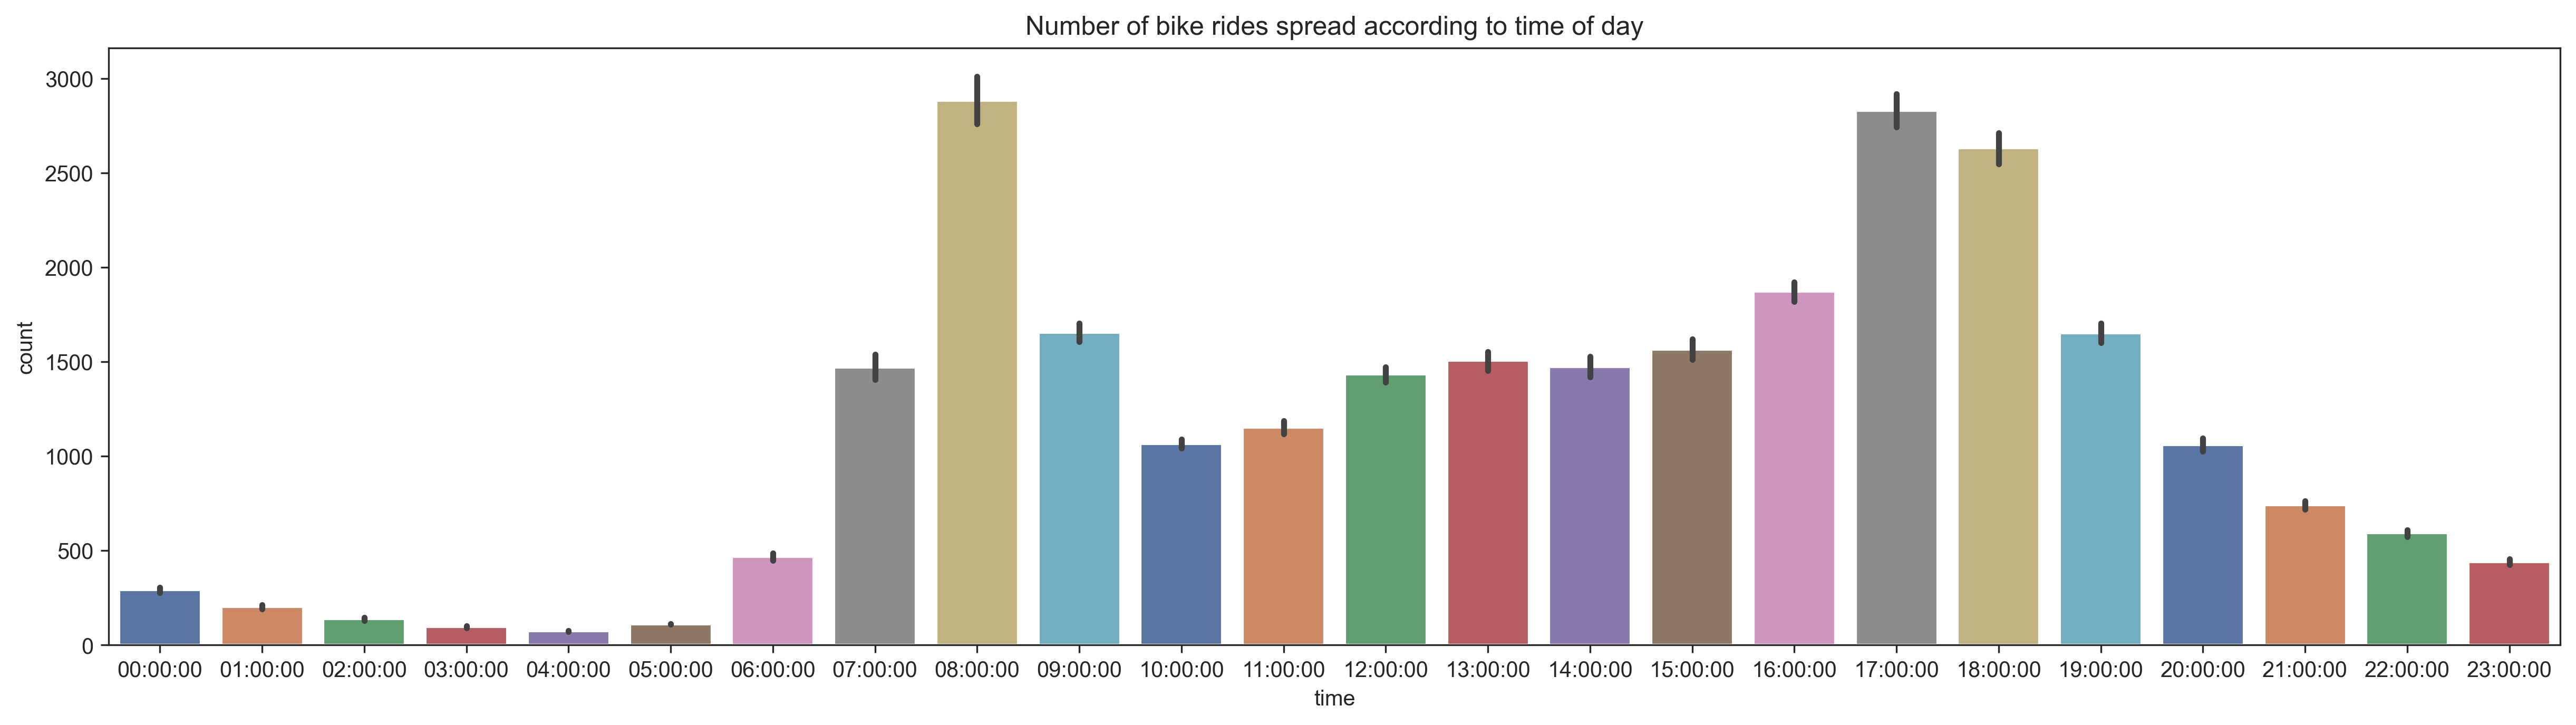

In [54]:
plt.figure(figsize=(20,5), dpi=300)
sns.barplot(data=bikes,
            x='time',
            y='count',
            palette='deep').set_title("Number of bike rides spread according to time of day");

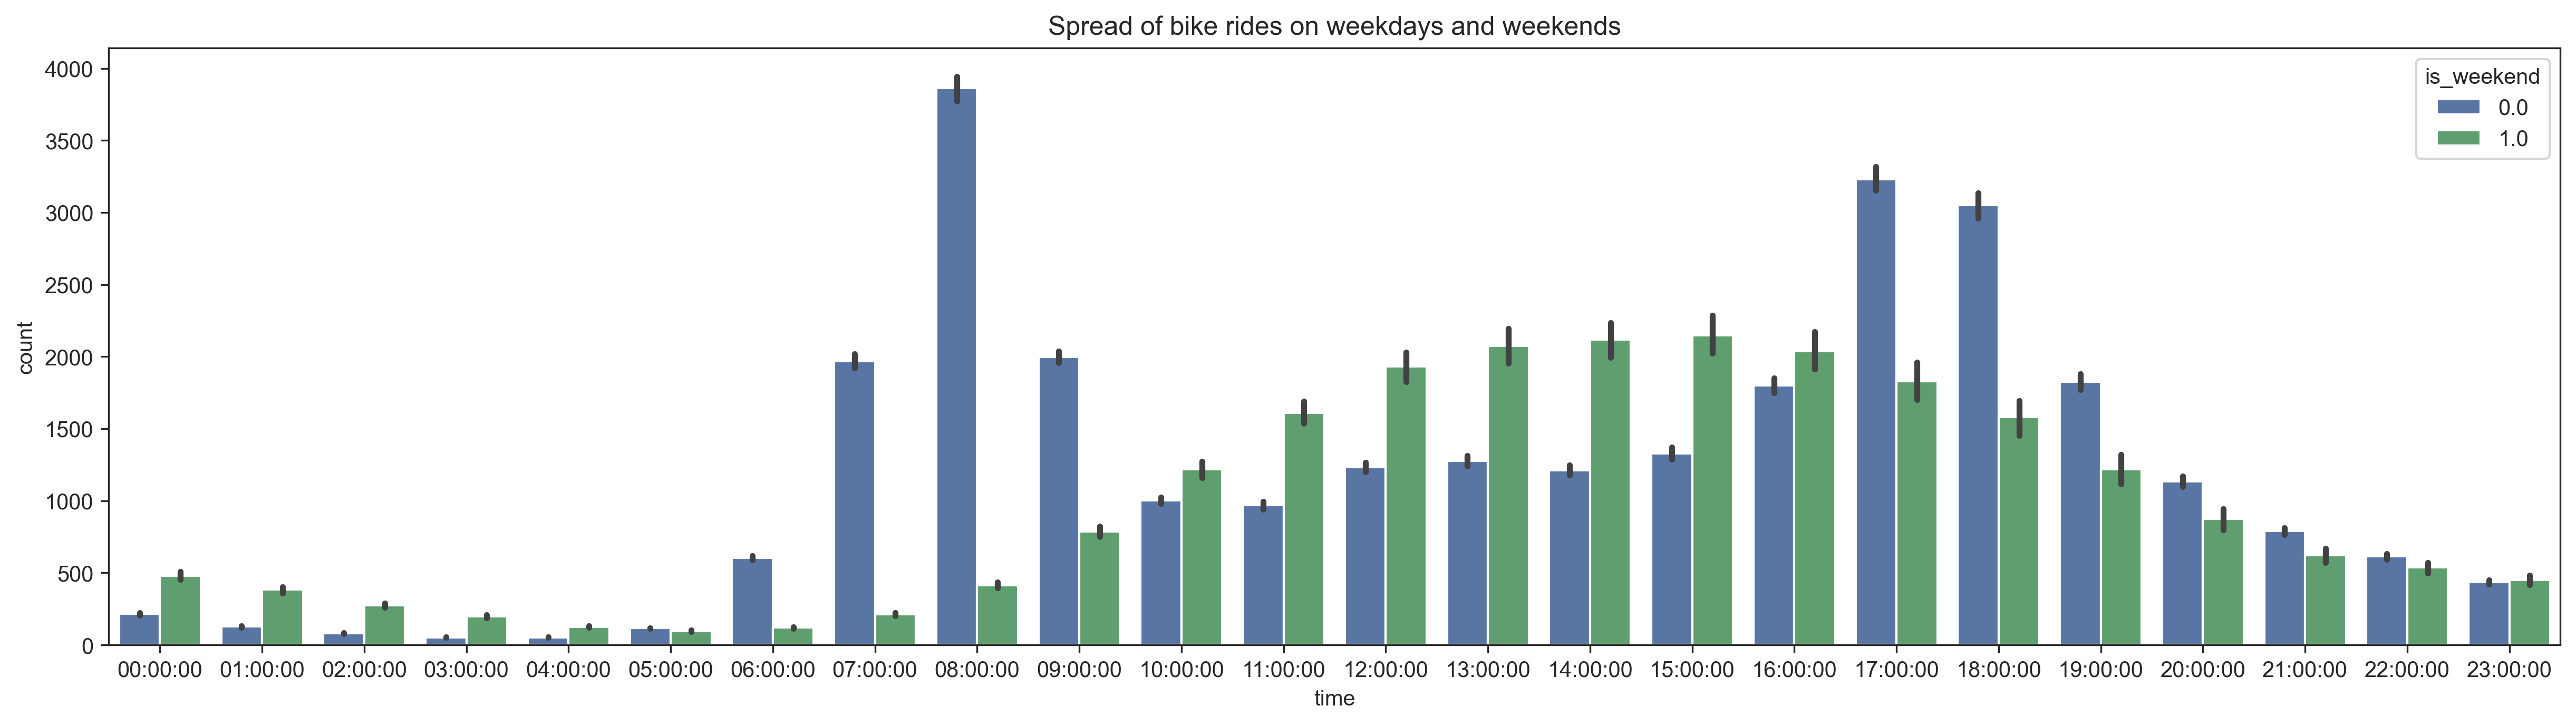

In [55]:
plt.figure(figsize=(20,5), dpi=300)
sns.barplot(data=bikes,
            x='time',
            y='count',
            hue='is_weekend').set_title("Spread of bike rides on weekdays and weekends");

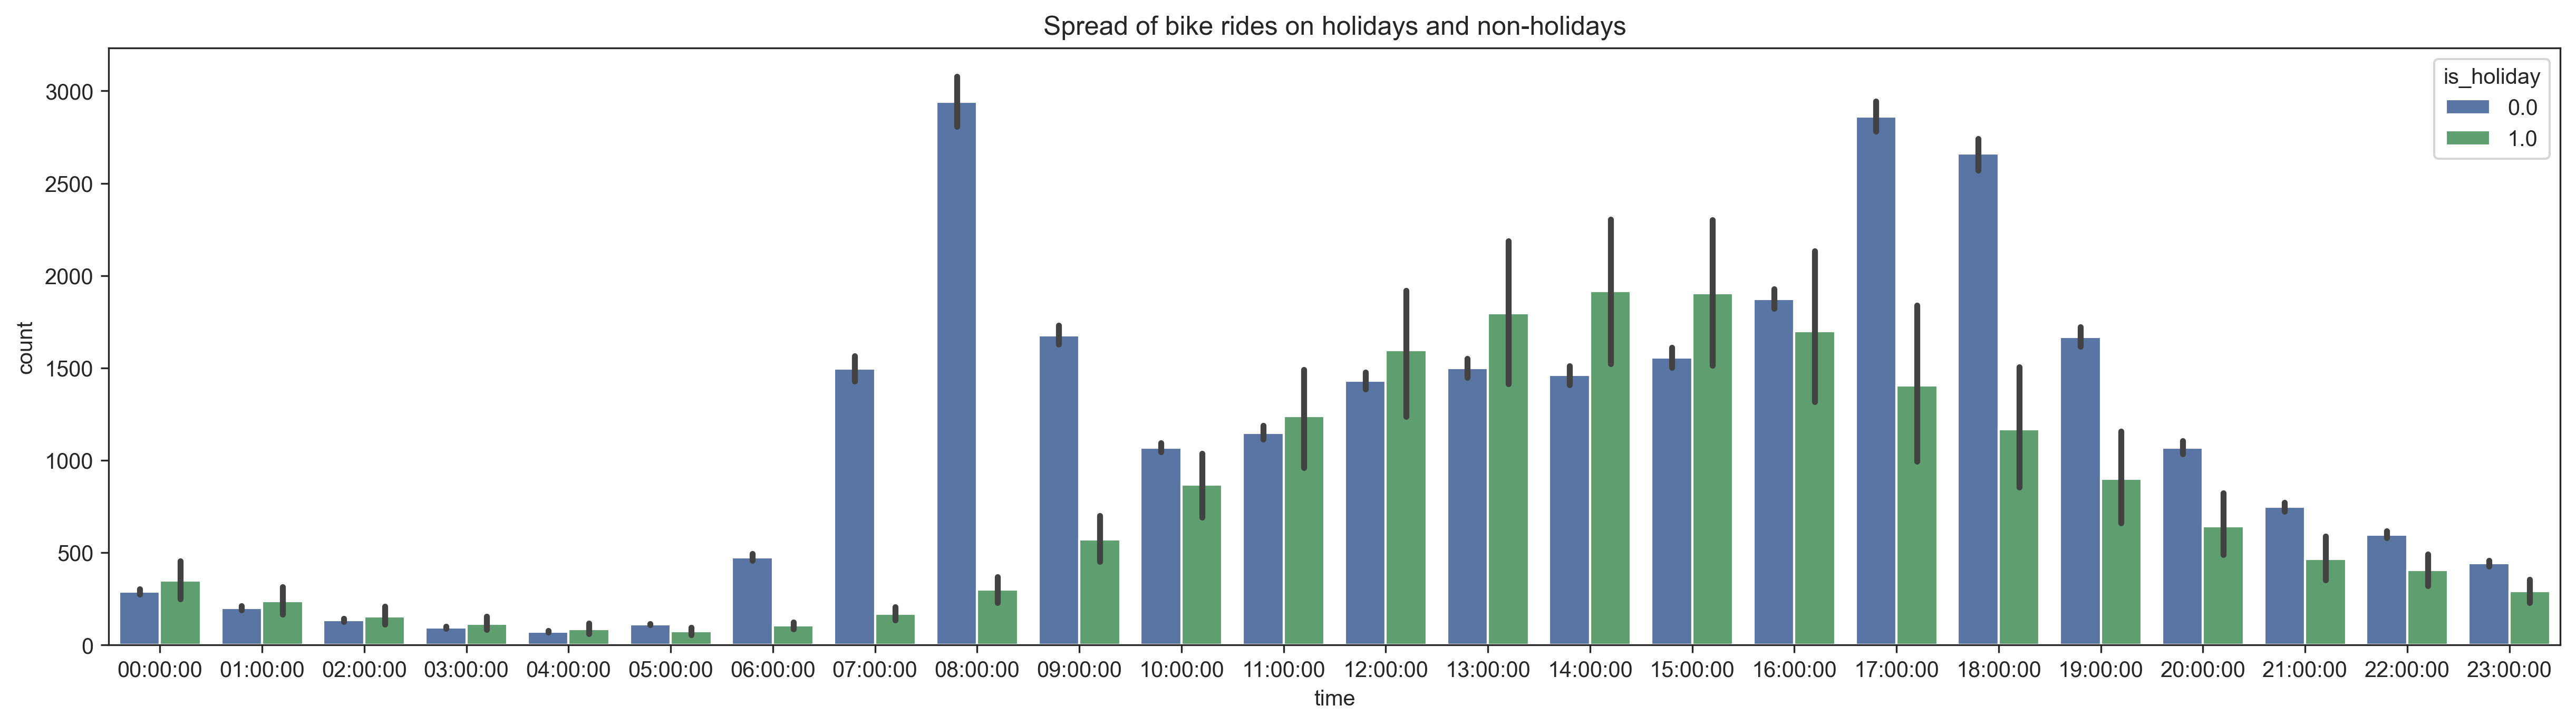

In [56]:
plt.figure(figsize=(20,5), dpi=300)
sns.barplot(data=bikes,
            x='time',
            y='count',
            hue='is_holiday').set_title("Spread of bike rides on holidays and non-holidays");

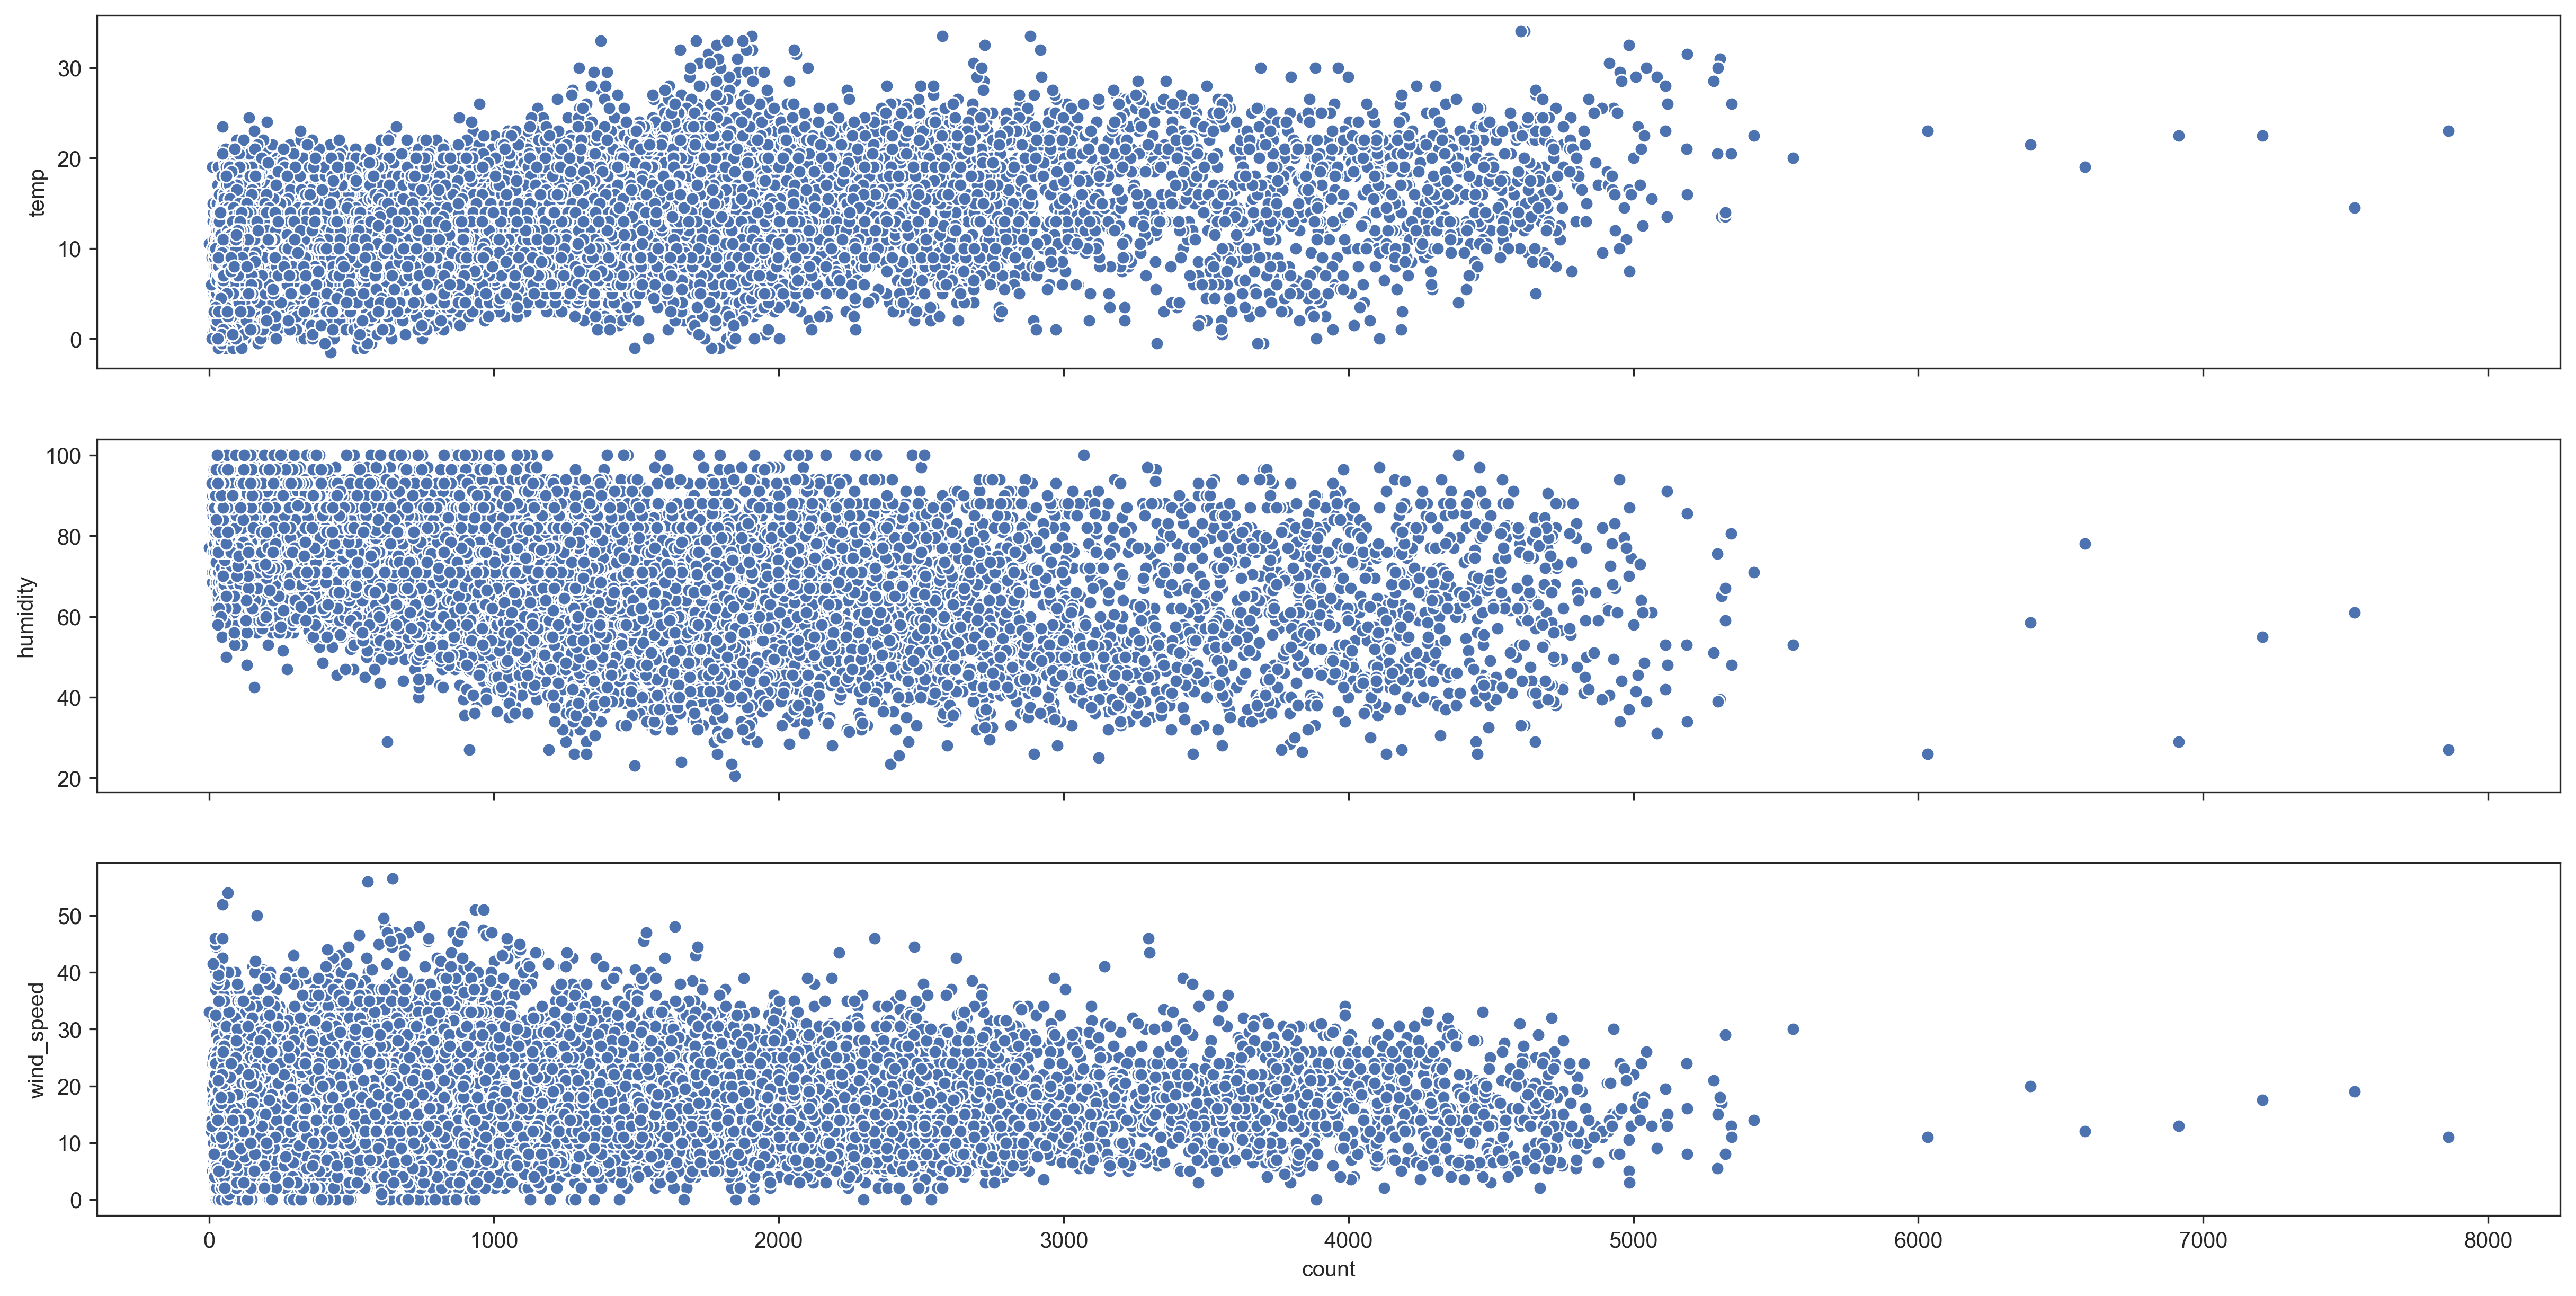

In [57]:
fig, ax = plt.subplots(3, sharex=True, figsize=(20,10), dpi=300)
sns.scatterplot(data=bikes,
               y='temp',
               x='count',
               ax=ax[0]);
sns.scatterplot(data=bikes,
               y='humidity',
               x='count',
               ax=ax[1]);
sns.scatterplot(data=bikes,
               y='wind_speed',
               x='count',
               ax=ax[2]);